It has happened. Aliens have arrived. They hail from a planet called Valhalla-23,
where the temperature is measured in Valks. These visitors tell you that they have
come to solve Earth’s global warming crisis*. They offer you a machine that will
solve the problem, but they warn you:
1. The machine must be set up in Valks.
2. If you input a wrong temperature value, you may end up freezing or scorching
the Earth.
3. No one knows how to transform between Celsius and Valks.

You are tasked with finding a model for solving this problem, so you ask Humans
and Valkians to collect temperature readings from several objects. The data are given
in the Valhalla23.csv file.


**Will you become Earth’s savior?
Or will you obliterate life?**

*The choice is yours...*

### **Cargamos y vemos los datos**

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score



data = pd.read_csv('Valhalla23.csv')

print(data.head())
print("")
print(data.isnull().sum())

   Celsius    Valks
0  61.4720 -139.740
1  70.5790 -156.600
2  -7.3013   73.269
3  71.3380 -165.420
4  43.2360  -75.835

Celsius    0
Valks      0
dtype: int64


### **En el siguiente recuadro, se creó un gráfico de dispersión de Celsius vs Valks**

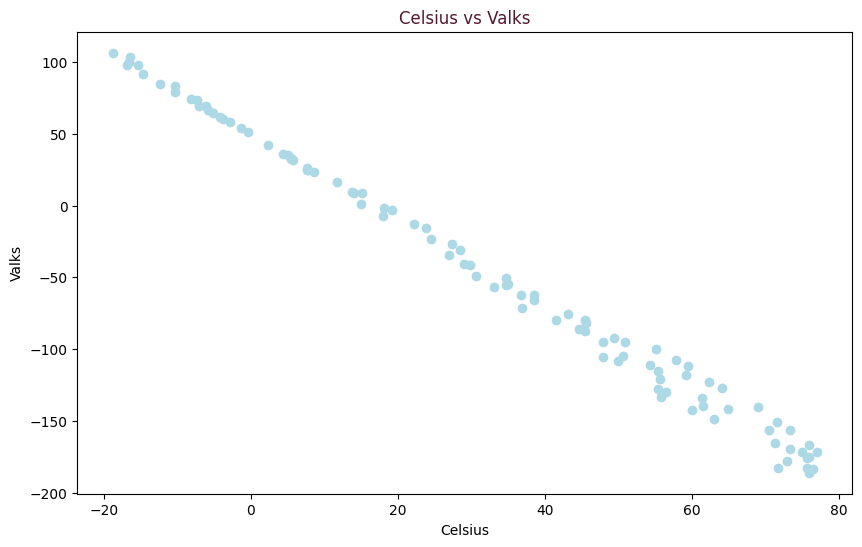

In [13]:
plt.figure(figsize=(10, 6))
plt.scatter(data['Celsius'], data['Valks'], color='lightblue')
plt.xlabel('Celsius')
plt.ylabel('Valks')
plt.title('Celsius vs Valks', color='#541730')
plt.show()

# **Inicio de Modelo**

## Cirterios para los valores para los hiper-parámetros del método:

1. Tasa de aprendizaje:
- Se utilizo la tasa de aprendizaje 0.01 porque es un valor que se tiende a utiizar ya que equilibra bien entre la convergencia rápida y la estabilidad del entrenamiento.

2. Número máximo y mínimo de iteraciones:
- 1000 como máximo para asegurar que el modelo tenga suficientes oportunidades para aprender las características de los datos.
- El modelo se configuró para no detenerse antes de alcanzar al menos 100 iteraciones.
- Esto es suficiente para alcanzar la convergencia y prevenir un entrenamiento excesivo.

3. Tolerancia:
- Se seleccionó una tolerancia de 1e-3 (0.001) para equilibrar entre la precisión y la eficiencia computacional.
- En este escenario no es necesario usar ula tolerancia más estricta.

4. Estrategia de la tasa de aprendizaje:
- Se eligió la estrategia de tasa de aprendizaje constante para mantener una tasa de aprendizaje fija durante todo el proceso de entrenamiento.
- Esto asegura que el modelo sigue aprendiendo a un ritmo constante y predecible.
- Esto es util para la estabilidad en el modelo, ya que se entrena con un número fijo de iteraciones.

5. Inicialización de los parámetros (random_state):
- Se fijó random_state=42 para asegurar la reproducibilidad de los resultados.

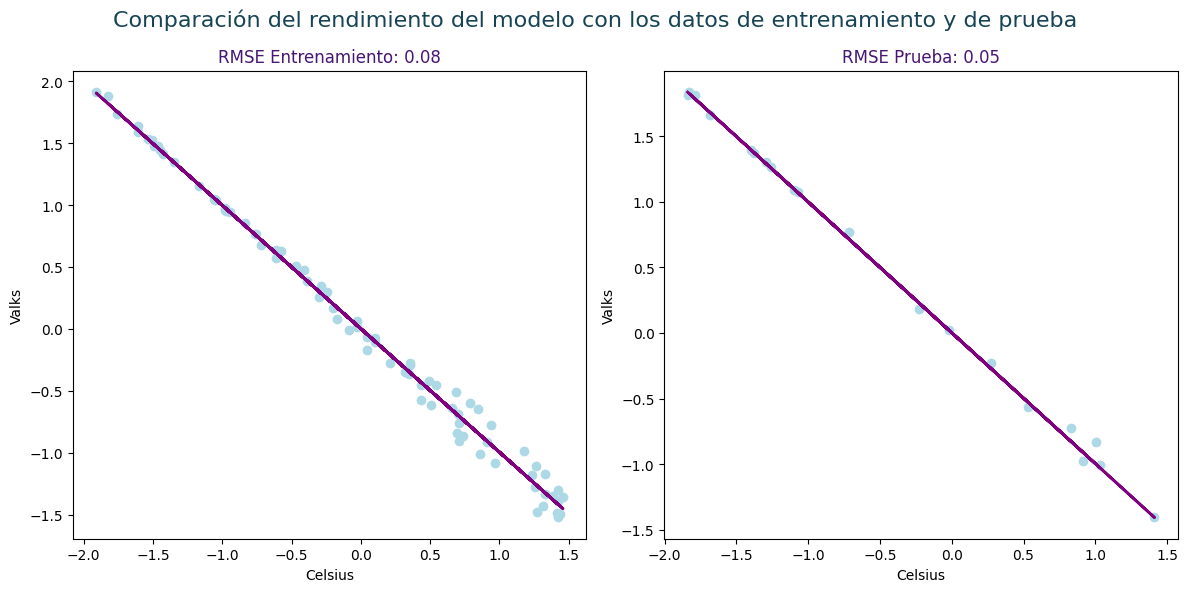

In [17]:
# Datos en X e y
X = data['Celsius'].values.reshape(-1, 1)
y = data['Valks'].values.reshape(-1, 1)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_y.fit_transform(y_train)
y_test = scaler_y.transform(y_test)

# Crear y entrenar el modelo
learning_rate = 0.01  # Tasa de aprendizaje
model = SGDRegressor(
    max_iter=1000,
    n_iter_no_change=100,  # Mínimo 100 iteraciones
    tol=1e-3,  # Tolerancia para detener el entrenamiento anticipadamente
    learning_rate='constant',
    eta0=learning_rate,
    random_state=42
)

# Entrenar el modelo con los datos normalizados
model.fit(X_train, y_train.ravel())

# Resultados del entrenamiento
y_train_pred = model.predict(X_train)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))

# Resultados de la prueba
y_test_pred = model.predict(X_test)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

# Crear una figura con 1 fila y 2 columnas para los subplots
plt.figure(figsize=(12, 6))
plt.suptitle('Comparación del rendimiento del modelo con los datos de entrenamiento y de prueba', fontsize=16, color='#174454')

# Gráfico de los datos de entrenamiento
plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
plt.scatter(X_train, y_train, color='lightblue')
plt.plot(X_train, y_train_pred, color='purple', linewidth=2)
plt.title(f'RMSE Entrenamiento: {train_rmse:.2f}', color='#471573')
plt.xlabel('Celsius')
plt.ylabel('Valks')

# Gráfico de los datos de prueba
plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
plt.scatter(X_test, y_test, color='lightblue')
plt.plot(X_test, y_test_pred, color='purple', linewidth=2)
plt.title(f'RMSE Prueba: {test_rmse:.2f}', color='#471573')
plt.xlabel('Celsius')
plt.ylabel('Valks')

# Mostrar ambos gráficos
plt.tight_layout()  # Ajusta los parámetros para que los subplots se ajusten al área de la figura
plt.show()
